In [ ]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from numpy import newaxis
np.set_printoptions(precision = 4 , suppress =True)

In [ ]:
def show_mnist_dataset():
  fig = plt.figure(figsize=(20,20))

  it=1
  for i in range(10):
    ax = fig.add_subplot(3,5,it,xticks=[],yticks=[])
    ax.imshow(x_train[i])
    it+=1

# 

# Loading and Showing Data

11501568/11490434 [==============================] - 0s 0us/step
Shape of the Dataset (60000, 28, 28)


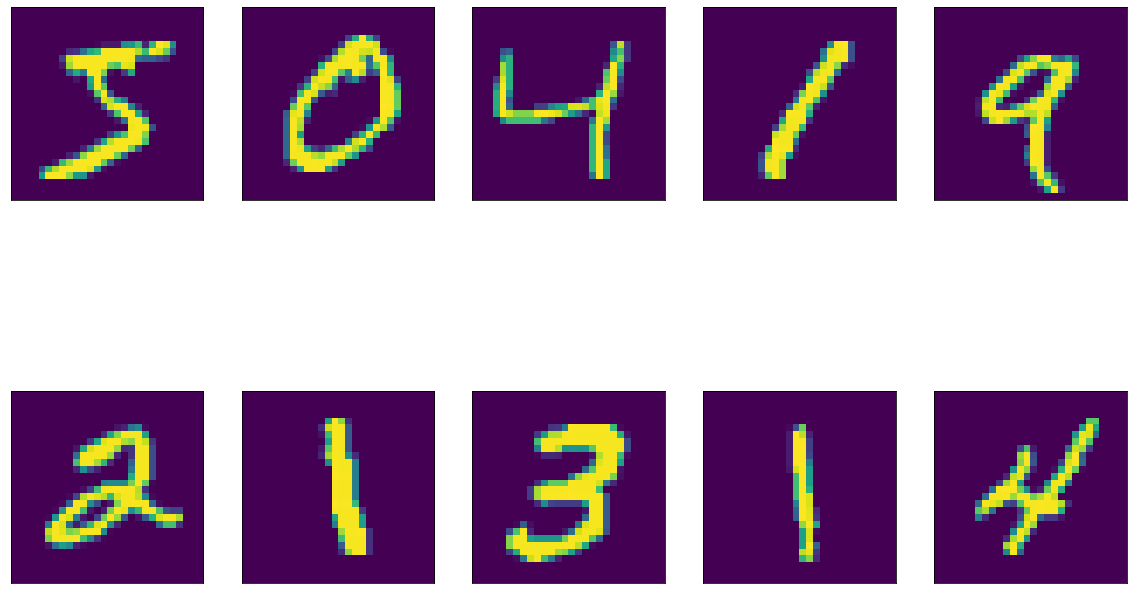

In [ ]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Shape of the dataset 
print(f"Shape of the Dataset {x_train.shape}")
show_mnist_dataset()

# Reshape Operation and Nomralization

In [ ]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
print(f"Shape of the reshaped Dataset {x_train.shape}")
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

#y_train
print(y_train.shape)
print(x_test.shape)

# One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Shape of the reshaped Dataset (60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)


In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train[0].shape

(28, 28, 1)

# Custom Data

In [ ]:
dataPath = '/content/drive/MyDrive/Datasets/numbers/'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

In [ ]:
CustomImages = load_images_from_folder(dataPath)

In [ ]:
customTestData = [2,0,8,5,4,8,3,9]
customTestData = np.array(customTestData)

In [ ]:
customTestData = tf.keras.utils.to_categorical(customTestData, 10)
customTestData

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Plotting Custom Data

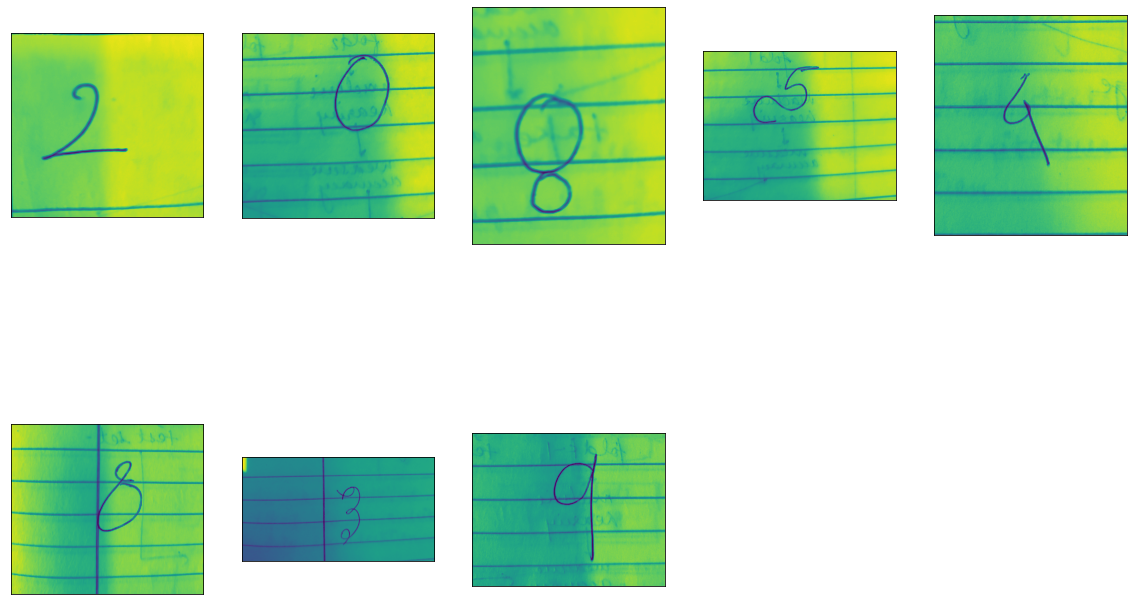

In [ ]:
fig = plt.figure(figsize=(20,20))

it=1
for image in CustomImages:
  ax = fig.add_subplot(3,5,it,xticks=[],yticks=[])
  ax.imshow(image)
  it+=1

# Preparing Custom Data for Prediction

In [ ]:
def PrepareData(CustomImages):
  preparedImage = []
  for image in CustomImages:
    image = cv2.resize(image,(28,28), interpolation = cv2.INTER_AREA)
    image = np.asarray(image)    
    image = image/255
    image = image[:, :, newaxis]
    preparedImage.append(image)
  return preparedImage

In [ ]:
preparedCustomData = PrepareData(CustomImages)

# Model Architecture

In [ ]:
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)= 156
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1))) #(24*24*6)

# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2))) #(12*12*6)

# The input matrix size of this layer is 12 * 12 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu')) #(8*8*16)

# The input matrix size of this layer is 8 * 8 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
print(f"Shape of the Dataset {x_train.shape}")

# The input matrix size of this layer is 4 * 4 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)

model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Shape of the Dataset (60000, 28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dens

# Prediction on the Custom Data

In [ ]:
for image in preparedCustomData:
    reshapedImage = image.reshape(1,28,28,1)
    print(np.argmax(model.predict(reshapedImage)))

4
1
4
1
1
1
1
1


In [ ]:
customTestData

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
preparedCustomData = np.array(preparedCustomData)

# Evaluating Model on custom Data

In [ ]:
score = model.evaluate(preparedCustomData, customTestData)

1/1 [==============================] - 0s 21ms/step - loss: 2.9710 - accuracy: 0.0000e+00


In [ ]:
print('Custom Test Loss:', score[0])
print('Custom Test accuracy:', score[1])

Custom Test Loss: 2.9710259437561035
Custom Test accuracy: 0.0


# LeNet Architecture 

In [ ]:
model = Sequential()

#input - (28,28,1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
#output - (24*24*6)

#input - (24,24,6)
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2))) 
#output - (12,12,6)

#input - (12,12,6)
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
#output - (8,8,16)

#input - (8,8,16)
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
#output - (4,4,16)

#input - (4,4,16)
model.add(Conv2D(120, kernel_size=(4, 4), activation='tanh',input_shape=(4,4,16)))
#output - (1,1,120)

print(f"Shape of the Dataset {x_train.shape}")
#input - (1,1,16)
model.add(Flatten())
#output - (None,120)

#input - (None,120)
model.add(Dense(84, activation='tanh'))
#ouput - (None,84)

#input - (None,84)
model.add(Dense(10, activation='softmax'))
#output - (None,10)

model.summary()
model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Shape of the Dataset (60000, 28, 28, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1, 120)         30840     
                                                                 
 flatten_2 (Fl

In [ ]:
for image in preparedCustomData:
    reshapedImage = image.reshape(1,28,28,1)
    print(np.argmax(model.predict(reshapedImage)))

8
8
8
8
8
8
8
8


In [ ]:
model.predict(x_train[0].reshape(1,28,28,1))

array([[0.    , 0.    , 0.    , 0.0056, 0.    , 0.9944, 0.    , 0.    ,
        0.    , 0.    ]], dtype=float32)

In [ ]:
score = model.evaluate(preparedCustomData, customTestData)

1/1 [==============================] - 0s 28ms/step - loss: 7.2082 - accuracy: 0.2500


In [ ]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 7.208162307739258
Test accuracy: 0.25


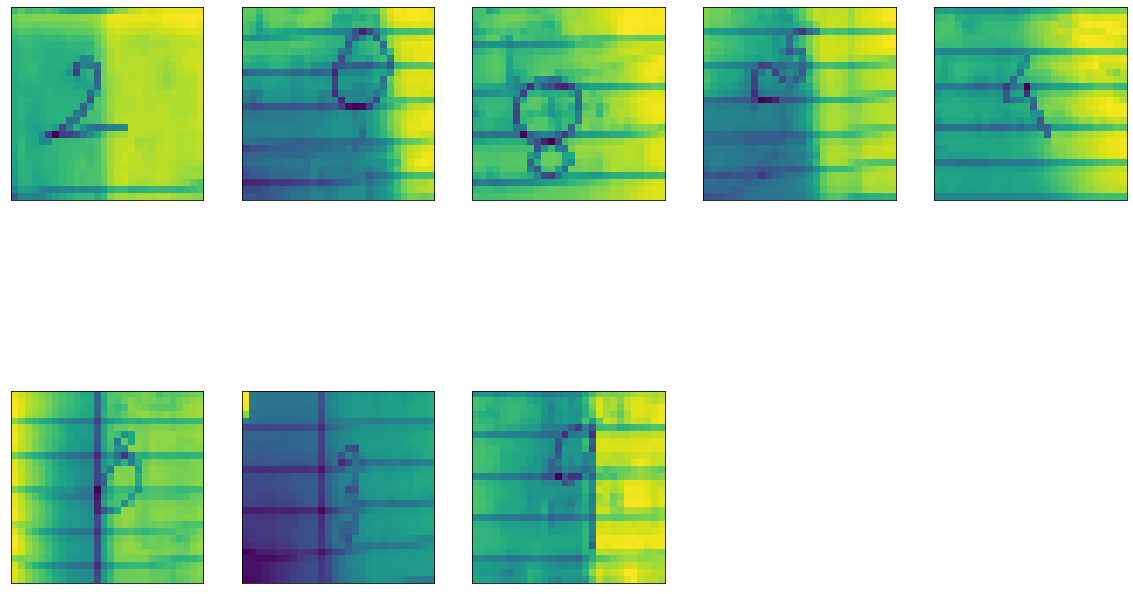

In [ ]:
fig = plt.figure(figsize=(20,20))

it=1
for image in preparedCustomData:
  image = image.reshape(28,28)
  ax = fig.add_subplot(3,5,it,xticks=[],yticks=[])
  ax.imshow(image)
  it+=1

In [29]:
model = Sequential()

#input - (28,28,1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
#output - (24*24*6)

#input - (24,24,6)
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2))) 
#output - (12,12,6)

#input - (12,12,6)
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
#output - (8,8,16)

#input - (8,8,16)
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
#output - (4,4,16)

#input - (4,4,16)
model.add(Conv2D(120, kernel_size=(4, 4), activation='relu',input_shape=(4,4,16)))
#output - (1,1,120)

print(f"Shape of the Dataset {x_train.shape}")
#input - (1,1,16)
model.add(Flatten())
#output - (None,120)

#Batch Normalization
keras.layers.BatchNormalization()

#input - (None,120)
model.add(Dense(60, activation='selu', kernel_initializer="lecun_normal"))
#ouput - (None,60)

#Batch Normalization
keras.layers.BatchNormalization()

#input - (None,60)
model.add(Dense(30, activation='selu', kernel_initializer="lecun_normal"))
#output - (None,30)

#input - (None,30)
model.add(Dense(10, activation='softmax'))
#output - (None,10)

model.summary()
model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Shape of the Dataset (60000, 28, 28, 1)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_15 (Conv2D)          (None, 1, 1, 120)         30840     
                                                                 
 flatten_5 (Fl

In [30]:
score = model.evaluate(preparedCustomData, customTestData)

1/1 [==============================] - 0s 20ms/step - loss: 6.5855 - accuracy: 0.2500


In [31]:
for image in preparedCustomData:
    reshapedImage = image.reshape(1,28,28,1)
    print(np.argmax(model.predict(reshapedImage)))

8
8
8
8
8
8
8
8


In [32]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 6.585520267486572
Test accuracy: 0.25
